## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import scipy.stats as stats

## 2. Get the Data

In [5]:
wine = pd.read_csv(r"wine_clean_dataset_after_EDA.csv" , index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1353, 12)

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,8.310569,0.529970,0.270813,2.515595,0.087375,15.849963,46.331486,0.996711,3.311397,0.655558,10.431941,5.623060
std,1.740485,0.183189,0.193877,1.336413,0.045186,10.424959,32.034659,0.001866,0.153322,0.158402,1.081120,0.822106
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.467000,72.000000,165.000000,1.003690,4.010000,1.620000,14.900000,8.000000


## 3. Normalization of Data

In [8]:
# z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = wine.columns
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
# for col in cols2zscore:
    
#     mean_val   = np.mean(wine[col])
#     std_val    = np.std(wine[col],ddof=1)
#     wine[col]  = (wine[col]-mean_val) / std_val

# can also do more compactly
wine[cols2zscore] = wine[cols2zscore].apply(stats.zscore)

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1353.000000
mean,2.100644e-17,3.098449e-16,-2.100644e-17,-2.100644e-17,1.470451e-16,1.050322e-17,9.452897e-17,9.742786e-14,2.100644e-15,-4.411352e-16,-2.730837e-16,5.623060
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,0.822106
min,-2.132705e+00,-2.238797e+00,-1.397346e+00,-1.209351e+00,-1.668717e+00,-1.424989e+00,-1.259461e+00,-3.559786e+00,-2.945193e+00,-2.056027e+00,-1.880174e+00,3.000000
25%,-6.957926e-01,-7.643609e-01,-9.329625e-01,-4.608027e-01,-3.846707e-01,-8.492346e-01,-7.598171e-01,-5.956490e-01,-6.615761e-01,-6.666405e-01,-8.623337e-01,5.000000
50%,-2.359807e-01,-5.444729e-02,-5.579317e-02,-2.362381e-01,-1.854221e-01,-1.775208e-01,-2.601734e-01,-6.037545e-03,-9.114213e-03,-2.245629e-01,-2.146174e-01,6.000000
75%,5.112136e-01,6.008575e-01,8.213762e-01,6.318125e-02,5.810394e-02,4.941930e-01,5.205199e-01,5.942941e-01,5.781015e-01,4.701305e-01,6.181607e-01,6.000000
max,4.362138e+00,5.734079e+00,2.678911e+00,9.719456e+00,8.404405e+00,5.388108e+00,3.705749e+00,3.740675e+00,4.558119e+00,6.090831e+00,4.134335e+00,8.000000


## 4. Creating Boolean Label

In [9]:
import warnings
warnings.filterwarnings(action = "ignore")

In [10]:
# create a new column for binarized (boolean) quality
wine['boolQuality'] = 0

# Binarizing the column
wine['boolQuality'][wine['quality']>5] = 1

wine[['quality','boolQuality']]

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1354,6,1
1355,5,0
1356,6,1
1357,5,0


In [11]:
wine['boolQuality'].value_counts()

# Almost balanced Data

1    716
0    637
Name: boolQuality, dtype: int64

## 5. Converting Data to tensor 

In [12]:
pred_col = wine.columns.drop(labels = ['quality', 'boolQuality'])
pred_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [13]:
arr_data = wine[pred_col].values

In [14]:
arr_data

array([[-0.5233631 ,  0.92850995, -1.39734632, ...,  1.29580955,
        -0.60348657, -0.95486462],
       [-0.29345717,  1.91146719, -1.39734632, ..., -0.72682228,
         0.15436075, -0.58474102],
       [-0.29345717,  1.25616236, -1.19095353, ..., -0.33534515,
        -0.03510108, -0.58474102],
       ...,
       [-1.38551036,  0.10937892, -0.88136434, ...,  1.36105574,
         0.65959229,  0.71069156],
       [-1.38551036,  0.6281619 , -0.77816795, ...,  1.68728668,
         0.34382257, -0.21461743],
       [-1.32803388, -1.20123074,  1.02776898, ...,  0.51285529,
         0.02805286,  0.52562976]])

#### Predictiors or Independent features

In [15]:
data = torch.tensor(arr_data ,dtype = torch.float )
data[:5]

tensor([[-0.5234,  0.9285, -1.3973, -0.4608, -0.2518, -0.4654, -0.3851,  0.5836,
          1.2958, -0.6035, -0.9549],
        [-0.2935,  1.9115, -1.3973,  0.0632,  0.2352,  0.8780,  0.6454,  0.0476,
         -0.7268,  0.1544, -0.5847],
        [-0.2935,  1.2562, -1.1910, -0.1614,  0.1024, -0.0816,  0.2395,  0.1548,
         -0.3353, -0.0351, -0.5847],
        [ 1.6607, -1.3651,  1.4922, -0.4608, -0.2740,  0.1104,  0.4268,  0.6908,
         -0.9878, -0.4772, -0.5847],
        [-0.5234,  0.7101, -1.3973, -0.5357, -0.2740, -0.2735, -0.1977,  0.5836,
          1.2958, -0.6035, -0.9549]])

In [16]:
type(data)

torch.Tensor

#### Labels

In [17]:
arr_label = wine["boolQuality"].values

In [18]:
arr_label

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [19]:
labels = torch.tensor(arr_label ,dtype = torch.float)

In [20]:
labels

tensor([0., 0., 0.,  ..., 1., 0., 1.])

In [21]:
labels[:,None]

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [22]:
labels = labels[:,None]

## 6. Convert the Data into Tensor Dataset

In [23]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [24]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# DataLoader
batchsize    = 32 
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True ,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) 

## 7. Custom Class for ANN model

In [25]:
# create a class for the model

def create_ANNwineNet(LR):
    
    class ANNwine_BatchNorm(nn.Module):

        def __init__(self):
            super().__init__()
            
            """
            With batchNorm: weight initialization is showing error
            due 1D weight matric resulting from BatchNorm1d
            Therefore commenting out the nn.BatchNorm1d layer
            
            """
            ### input layer
            self.input = nn.Linear(11,16)

            ### hidden layers(fc : Fully Connected)
            self.fc1 = nn.Linear(16,32) 
            #self.bnorm1 = nn.BatchNorm1d(16) # 16 : number of input features to self.fc1

            self.fc2 = nn.Linear(32,32)
            #self.bnorm2 = nn.BatchNorm1d(32) # 32 : number of input features to self.fc2

            ### output layer
            self.output = nn.Linear(32,1)

        # forward pass
        def forward(self,x ,DoBN):

            x = F.relu( self.input(x) )

            if DoBN:

                # Hidden layer -1 
                #x = self.bnorm1(x)
                x = F.relu( self.fc1(x) )

                # Hidden Layer -2 
                #x = self.bnorm2(x)
                x = F.relu(self.fc2(x))

            else : 

                # Hidden Layer -1 
                x = F.relu( self.fc1(x) )

                # Hidden Layer -2
                x = F.relu(self.fc2(x))


            return self.output(x)
        
    # create the model instance
    ANN_model = ANNwine_BatchNorm()

    # loss function : Negative Log-Likelihood Loss function
    lossfunc = nn.BCEWithLogitsLoss()

    # optimizer
    #optimizer = torch.optim.Adam(ANN_model.parameters(),lr=LR)
    optimizer = torch.optim.SGD(ANN_model.parameters(),lr=LR)
    
    return ANN_model,lossfunc,optimizer

## 8. Custom Train Model Function

In [26]:
# Function that trains the model

def trainTheModel(Model, lossfunc, optimizer, train_loader, test_loader, epochs, DoBN):

    # loss function and optimizer
    lossfunc = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(Model.parameters(),lr=LR)

    # initialize losses
    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        for X,y in train_loader:

            # forward pass and loss
            yHat_train = Model(X ,DoBN )  
            #print("Y predicted : " , yHat_train.shape)
            #print("Y Actual : " ,y.shape)
            
            loss = lossfunc(yHat_train,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute training accuracy for this batch
            batchAcc.append( 100*torch.mean( ( (yHat_train>0) == y ).float() ).item() )
            # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # Get average losses across the batches
        losses[epochi] = np.mean(batchLoss)
    
        # ****** TESTING *******
        Model.eval()
        
        # extract X,y from test dataloader
        X,y = next(iter(test_loader)) 
        
        with torch.no_grad(): # deactivates autograd
            yHat_test = Model(X ,DoBN)
            
        # test accuracy    
        testAcc.append( 100*torch.mean( ( (yHat_test>0) == y ).float() ).item() )
  
    # function output for each iteration(epoch)
    return trainAcc,testAcc,losses,Model

## 9. Model Training

In [27]:
# This cell takes 1 mins
numepochs = 500
#LR = 0.001   # adam optimizer small LR
LR = 0.01   # SGD optimizer bit large LR

# Create and train a model with Batch-Normalization
ANN_winemodel,Lossfunc,Optimizer = create_ANNwineNet(LR=LR)

TrainAcc,TestAcc,Losses,Trained_model = trainTheModel(Model = ANN_winemodel,                                                                                                             
                                                      lossfunc=Lossfunc ,
                                                      optimizer=Optimizer,
                                                      train_loader=train_loader ,
                                                      test_loader=test_loader,
                                                      epochs = numepochs,
                                                      DoBN  = True)
                    


## 10. Results Visualization

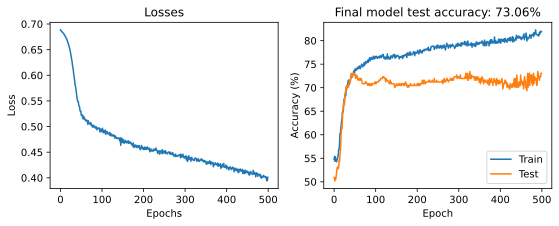

In [28]:
fig,ax = plt.subplots(1,2,figsize=(9,3))

ax[0].plot(Losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc,label='Train')
ax[1].plot(TestAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## 11. Experiment 

### (a) Initialize weights and Test the models

In [29]:
# This cell takes 3 mins
numepochs = 500
#LR = 0.001   # adam optimizer small LR
LR = 0.01   # SGD optimizer bit large LR

In [30]:
# Create and train a model with Batch-Normalization
ANN_winemodel_X, Lossfunc_X, Optimizer_X = create_ANNwineNet(LR=LR)

# Change the weights (leave biases as Kaiming [default])
for p in ANN_winemodel_X.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)


TrainAcc_X,TestAcc_X,Losses_X,Trained_model_X = trainTheModel(Model = ANN_winemodel_X,                                                                                                             
                                                              lossfunc=Lossfunc_X ,
                                                              optimizer=Optimizer_X,
                                                              train_loader=train_loader ,
                                                              test_loader=test_loader,
                                                              epochs = numepochs,
                                                              DoBN  = True)

In [31]:
### input layer
# self.input = nn.Linear(11,16)

# ### hidden layers(fc : Fully Connected)
# self.fc1 = nn.Linear(16,32) 
# self.bnorm1 = nn.BatchNorm1d(16) # 16 : number of input features to self.fc1

# self.fc2 = nn.Linear(32,32)
# self.bnorm2 = nn.BatchNorm1d(32) # 32 : number of input features to self.fc2

# ### output layer
# self.output = nn.Linear(32,1)

In [32]:
for p in ANN_winemodel_X.named_parameters():
    if 'weight' in p[0]:
        #nn.init.xavier_normal_(p[1].data)
        print(p[1].data.shape)
        print(p[1].data)
        print("*"*20,"\n")

torch.Size([16, 11])
tensor([[ 5.9333e-01, -2.0212e-02,  2.2618e-01,  8.4964e-02,  3.6603e-01,
          6.5725e-01, -2.5109e-01,  7.8973e-02, -2.4371e-01, -2.8635e-01,
         -1.3482e-01],
        [ 2.2252e-01,  2.0007e-02,  1.4945e-01, -1.2632e-02, -4.5787e-01,
          5.0601e-01, -1.4240e-01,  2.6907e-01, -3.3690e-01, -7.9881e-02,
          5.0765e-01],
        [ 1.2412e-02, -3.5424e-01,  8.7574e-03,  1.5760e-01,  5.5147e-01,
          2.3260e-01, -3.9246e-01,  3.6220e-02, -3.3866e-02,  4.2964e-01,
          2.1900e-01],
        [ 3.1319e-01,  7.5636e-02, -4.1172e-02, -6.3577e-01, -2.6907e-01,
          2.4923e-01, -2.7588e-02, -1.5982e-01, -8.7352e-02,  3.1981e-01,
          6.1783e-01],
        [-1.9406e-01,  2.5385e-01,  2.2185e-01, -3.0256e-01,  4.9921e-01,
          3.4310e-02,  4.2267e-02, -1.1997e-01,  4.1671e-01, -3.1244e-02,
         -1.7219e-01],
        [-8.9318e-01,  4.6481e-02, -6.1290e-01, -3.2434e-01,  7.0915e-02,
         -1.8375e-01,  1.5004e-01, -1.3385e-01, -2

In [33]:
# Create and train a model with Batch-Normalization
ANN_winemodel_K, Lossfunc_K, Optimizer_K = create_ANNwineNet(LR=LR)

# Change the weights (leave biases as Kaiming [default])
for p in ANN_winemodel_K.named_parameters():
    if 'weight' in p[0]:
        nn.init.kaiming_uniform_(p[1].data, nonlinearity='relu' )


TrainAcc_K,TestAcc_K,Losses_K,Trained_model_K = trainTheModel(Model = ANN_winemodel_K,                                                                                                             
                                                              lossfunc=Lossfunc_K ,
                                                              optimizer=Optimizer_K,
                                                              train_loader=train_loader ,
                                                              test_loader=test_loader,
                                                              epochs = numepochs,
                                                              DoBN  = True)

#### Results Visualization

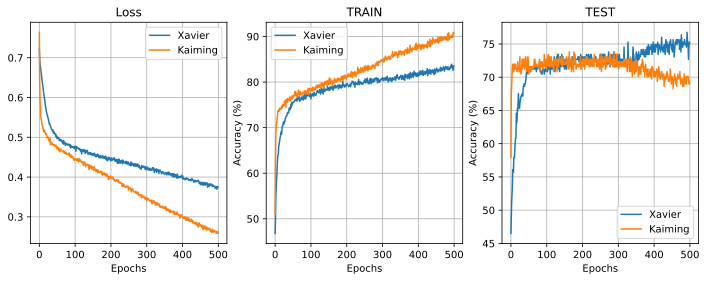

In [34]:
# plot the results

fig,ax = plt.subplots(1,3,figsize=(12,4), dpi=145)


# Losses plot
ax[0].plot(Losses_X,label='Xavier')
ax[0].plot(Losses_K,label='Kaiming')
ax[0].set_title('Loss')

# Train accuracy plot
ax[1].plot(TrainAcc_X,label='Xavier')
ax[1].plot(TrainAcc_K,label='Kaiming')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('TRAIN')


# Test accuracy plot
ax[2].plot(TestAcc_X,label='Xavier')
ax[2].plot(TestAcc_K,label='Kaiming')
ax[2].set_ylabel('Accuracy (%)')
ax[2].set_title('TEST')

for i in range(3):
    ax[i].legend()
    ax[i].grid('on')
    ax[i].set_xlabel('Epochs')


plt.show()

### (b) Repeat the experiment to get more stable results

In [35]:
# Total time = 10mins
# Number of experiment iterations (note: ~1 min/iteration)
numExps = 10

# epochs per EXP_Run
numepochs = 500
#LR = 0.001   # adam optimizer small LR
LR = 0.01   # SGD optimizer bit large LR

# dimensions of results:
#  1 - Experiment run
#  2 - Metric (loss/train/test Accuracy)
#  3 - Weight init (X/K)
results = np.zeros( (numExps,3,2) )


for expi in range(numExps):

    ### XAVIER 
    
    # Create and train a model
    ANN_winemodel_X, Lossfunc_X, Optimizer_X = create_ANNwineNet(LR=LR)

    # Xavier Initialization (leave biases as Kaiming [default])
    for p in ANN_winemodel_X.named_parameters():
        if 'weight' in p[0]:
            nn.init.xavier_normal_(p[1].data)


    TrainAcc_X,TestAcc_X,Losses_X,Trained_model_X = trainTheModel(Model = ANN_winemodel_X,                                                                                                             
                                                              lossfunc=Lossfunc_X ,
                                                              optimizer=Optimizer_X,
                                                              train_loader=train_loader ,
                                                              test_loader=test_loader,
                                                              epochs = numepochs,
                                                              DoBN  = True)


    ### KAIMING
    # Create and train a model
    ANN_winemodel_K, Lossfunc_K, Optimizer_K = create_ANNwineNet(LR=LR)

    # Kaiming Initialization (leave biases as Kaiming [default])
    for p in ANN_winemodel_K.named_parameters():
        if 'weight' in p[0]:
            nn.init.kaiming_uniform_(p[1].data, nonlinearity='relu' )


    TrainAcc_K,TestAcc_K,Losses_K,Trained_model_K = trainTheModel(Model = ANN_winemodel_K,                                                                                                             
                                                              lossfunc=Lossfunc_K ,
                                                              optimizer=Optimizer_K,
                                                              train_loader=train_loader ,
                                                              test_loader=test_loader,
                                                              epochs = numepochs,
                                                              DoBN  = True)
    

    ### collect the results!
    results[expi,0,0] = torch.mean(Losses_X[-5:]).item()
    results[expi,0,1] = torch.mean(Losses_K[-5:]).item()

    results[expi,1,0] = np.mean(TrainAcc_X[-5:])
    results[expi,1,1] = np.mean(TrainAcc_K[-5:])

    results[expi,2,0] = np.mean(TestAcc_X[-5:])
    results[expi,2,1] = np.mean(TestAcc_K[-5:])


    # a little update message...
    print(f'Finished run {expi+1}/{numExps}')

Finished run 1/10
Finished run 2/10
Finished run 3/10
Finished run 4/10
Finished run 5/10
Finished run 6/10
Finished run 7/10
Finished run 8/10
Finished run 9/10
Finished run 10/10


#### Results Visualization

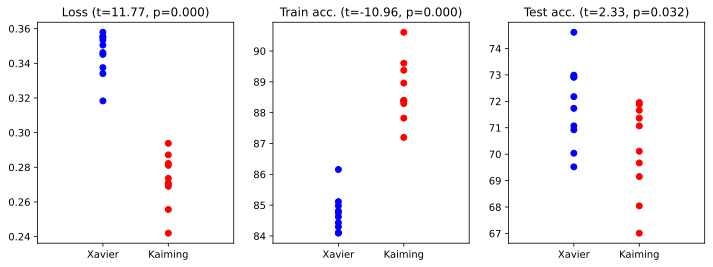

In [36]:
# And plot the results
fig,ax = plt.subplots(1,3,figsize=(12,4), dpi=145)

# plot titles
metric = ['Loss','Train acc.','Test acc.']

for i in range(3):
  
    # Plot the results
    ax[i].plot(np.zeros(numExps),results[:,i,0],'bo')
    ax[i].plot(np.ones(numExps),results[:,i,1],'ro')

    # Run a t-test to formalize the comparison
    t,p = stats.ttest_ind(results[:,i,0],results[:,i,1])
    title = '%s (t=%.2f, p=%.3f)' %(metric[i],t,p)


    # Make the plot look a bit nicer
    ax[i].set_xlim([-1,2])
    ax[i].set_xticks([0,1])
    ax[i].set_xticklabels(['Xavier','Kaiming'])
    ax[i].set_title(title)

plt.show()